# PART 1 - MODELLING

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
#import mpld3 as mpl

#import model from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Loading Datasets

In [2]:
df = pd.read_csv('breast-cancer.csv', header= None) 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_header = pd.read_csv('field_names.txt',sep="\t", header = None)

In [4]:
df_header = pd.DataFrame(df_header)

In [5]:
df_header_new = df_header.T

df_header_T = df_header.T
df_header_T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst


In [6]:
#change dataframe header with top row values

new_header = df_header_T.iloc[0] #grab the first row for the header
df_header_T = df_header_T[1:] #take the data less the header row
df_header_T.columns = new_header #set the header row as the df header

In [7]:
new_header

0                             ID
1                      diagnosis
2                    radius_mean
3                radius_sd_error
4                   radius_worst
5                   texture_mean
6               texture_sd_error
7                  texture_worst
8                 perimeter_mean
9             perimeter_sd_error
10               perimeter_worst
11                     area_mean
12                 area_sd_error
13                    area_worst
14               smoothness_mean
15           smoothness_sd_error
16              smoothness_worst
17              compactness_mean
18          compactness_sd_error
19             compactness_worst
20                concavity_mean
21            concavity_sd_error
22               concavity_worst
23           concave_points_mean
24       concave_points_sd_error
25          concave_points_worst
26                 symmetry_mean
27             symmetry_sd_error
28                symmetry_worst
29        fractal_dimension_mean
30    frac

In [8]:
#create a new data frame to hold header + contents

totalRow = len(df.index)

df_new = df.iloc[0: totalRow]

df_new

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#add the header from txt file

df_new = df_new.rename(columns = new_header)

In [10]:
df_new

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Transformation Techniques

In [11]:
#Transform 1 : ID col will not be used for ml, so can drop

df_new.drop(["ID"],axis=1,inplace=True)

In [12]:
#Transform 2: change categorical values to numerical

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_new.diagnosis = le.fit_transform(df_new.diagnosis)
#df_new

In [ ]:
#corr = df_new.corr()
#corr.head()

In [ ]:
#df_new.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
#corr=df_new.corr()["diagnosis"]
#corr[np.argsort(corr, axis=0)[:-1]]

# Mean, Median and Interpretation

In [13]:
#dataframe for benign

df_new_benign = df_new.loc[(df_new['diagnosis'] == 0)] 


In [14]:
#calculate mean and median smoothness and compactness of benign

print('Benign Mean-smoothness :' , df_new_benign['smoothness_mean'].mean())

print('Benign Median-smoothness:', df_new_benign['smoothness_mean'].median())

print('Benign Mean-compactness :' , df_new_benign['compactness_mean'].mean())

print('Benign Median-compactness:', df_new_benign['compactness_mean'].median())

Benign Mean-smoothness : 2.0003212885154085
Benign Median-smoothness: 1.851
Benign Mean-compactness : 0.02143824649859945
Benign Median-compactness: 0.01631


Interpretation :

Data distribution is skewed to right, assymetrical- median is less than mean for both smoothness and compactness. If symmetric, mean and median should be approximately same in value.

In [15]:
#dataframe for malignant

df_new_malignant = df_new.loc[(df_new['diagnosis'] == 1)] 

In [16]:
#calculate mean and median smoothness and compactness of malignant

print('Malignant Mean-smoothness :' , df_new_malignant['smoothness_mean'].mean())

print('Malignant Median-smoothness:', df_new_malignant['smoothness_mean'].median())

print('Malignant Mean-compactness :' , df_new_malignant['compactness_mean'].mean())

print('Malignant Median-compactness:', df_new_malignant['compactness_mean'].median())

Malignant Mean-smoothness : 4.323929245283021
Malignant Median-smoothness: 3.6795
Malignant Mean-compactness : 0.03228116509433961
Malignant Median-compactness: 0.028589999999999997


Interpretation :

Data distribution is skewed to right, assymetrical- median is less than mean for both smoothness and compactness. If symmetric, mean and median should be approximately same in value.

# Generate Bootstrap Samples

In [17]:
#Function to generate bootstrap samples : Assume 1000 bootstrap samples of size 100 each

def get_bootstrap_samples():
    my_samples = []
    for _ in range(1000):
        
        indices = np.random.choice(sample, size=100, replace=True)
        return my_samples.append(indices.mean())
    
    print(np.mean(my_samples))
    

# Exploratory Analysis

In [18]:
corr = df_new.corr()
corr.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


In [19]:
df_new.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
radius_sd_error,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
radius_worst,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
texture_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
texture_sd_error,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
texture_worst,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
perimeter_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
perimeter_sd_error,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
perimeter_worst,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


## Variables predictive of a malignant tumor :


1) radius_mean 2) perimeter_sd_error 3) concavity_worst

Reason : High correlation between these 3 features and target- diagnosis variable of > 0.7

## Visualization and Interpretation

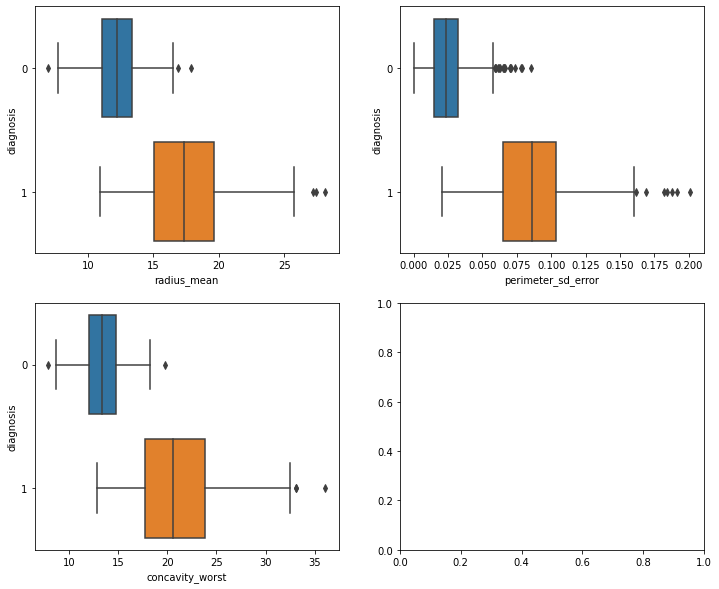

In [20]:
#box plots
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12,10))

ax = sns.boxplot(x="radius_mean", y="diagnosis", data=df_new, orient='h', 
    ax=axes[0, 0])
ax = sns.boxplot(x="perimeter_sd_error", y="diagnosis", data=df_new, orient='h', 
    ax=axes[0, 1])
ax = sns.boxplot(x="concavity_worst", y="diagnosis", data=df_new, orient='h', 
    ax=axes[1, 0])
#ax = sns.boxplot(x="fractal_dimension_mean", y="diagnosis", data=df_new, orient='h', 
   # ax=axes[1, 1])


When diagnosis is positive (i.e = 1 (malignant)), all the strongly related predictors have larger values and variability (large inter quartile range) than when compared to benign

# Machine Learning Models For Prediction

In [21]:
# Feature selection for model building- features can be dropped as visualized from heatmap above

# drop this columns as correlation of <0.1 with target- diagnosis

df_new=df_new.drop(['smoothness_worst','area_mean','area_worst','concavity_mean','concavity_sd_error'],axis=1)

In [23]:
#df_new.head()

In [24]:
# set the target = diagnosis and x= features
y = df_new.iloc[:,0]
x = df_new.iloc[:,1:25]

In [25]:
# Apply min-max scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.56861022, 0.91202749,
        0.59846245],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.19297125, 0.63917526,
        0.23358959],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.35974441, 0.83505155,
        0.40370589],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.27180511, 0.48728522,
        0.12872068],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.74976038, 0.91065292,
        0.49714173],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.        ,
        0.25744136]])

In [26]:
# Split the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, shuffle=True,random_state=0,test_size=0.3)

In [27]:
#create a function for the results

from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, classification_report

def results(pred, x_test, y_test, model):
    
    result = confusion_matrix(y_test, pred)

    sns.heatmap(result, annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    
    score = model.score(x_test, y_test)
    average_precision = average_precision_score(y_test, pred)
    report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    
    print(f'Model accuracy score ..................................: {score}')
    
    print('\n')
    print(report)
    print('\n')

## 1st Model : Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(C=6).fit(x_train, y_train)
pred_log_reg = model_log_reg.predict(x_test)

## Performance evaluation

Model accuracy score ..................................: 0.9766081871345029


                    0          1  accuracy   macro avg  weighted avg
precision    0.972727   0.983607  0.976608    0.978167      0.976735
recall       0.990741   0.952381  0.976608    0.971561      0.976608
f1-score     0.981651   0.967742  0.976608    0.974697      0.976527
support    108.000000  63.000000  0.976608  171.000000    171.000000




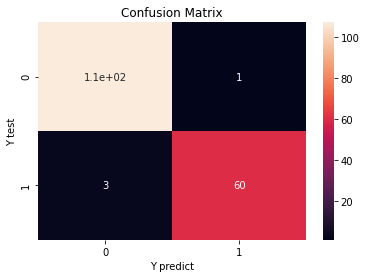

In [29]:
results(pred_log_reg, x_test, y_test, model_log_reg)

# 2nd Model : Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_random_forest = RandomForestClassifier().fit(x_train, y_train)
pred_random_forest = model_random_forest.predict(x_test)

## Performance evaluation

Model accuracy score ..................................: 0.9649122807017544


                    0          1  accuracy   macro avg  weighted avg
precision    0.972222   0.952381  0.964912    0.962302      0.964912
recall       0.972222   0.952381  0.964912    0.962302      0.964912
f1-score     0.972222   0.952381  0.964912    0.962302      0.964912
support    108.000000  63.000000  0.964912  171.000000    171.000000




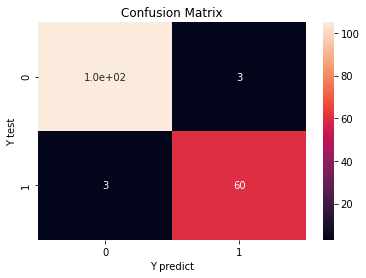

In [32]:
results(pred_random_forest, x_test, y_test, model_random_forest)

Advantages of LR over RF - LR is best for binary classification, outputs an associated probability for each class. In this case, the dataset we are dealing  with is numeric

Disadvantage of LR - assumes linearity btw diagnosis (target) and features. Not a relaisitc assumption to hold for real world datasets.

Advantages of RF over LR - perform better when we are dealing with categorical rather than numeric data.

Disadvantage of RFC - Challenging to interpret model since classifier is a collection of prediction trees to determine class.

LR and overfitting - Consider L1 / L2 regularization technique.

RFC and overfitting - Add trees but not in entirety, prune as well and hyperparameter tuning on parameters = {nodesize, max_depth, no_of_variables_to_build_tree}

## Identifying Important Predictors For LR & RFC

LR important Predictive Variables identifed through p value score

In [33]:
X=df_new.iloc[:,1:25]
Y=df_new['diagnosis']

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.034862
         Iterations 17
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.947      
Dependent Variable:       diagnosis            AIC:                  87.6735    
Date:                     2022-12-07 04:39     BIC:                  191.9266   
No. Observations:         569                  Log-Likelihood:       -19.837    
Df Model:                 23                   LL-Null:              -375.72    
Df Residuals:             545                  LLR p-value:          1.4724e-135
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           17.0000                                               
--------------------------------------------------------------------------------
                             Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
---------------------------------------


RF - most important predictive variables is determined through mean decrease of Gini index (impurity) through scikit learn package or alternatively, permutation based feaure importance.

In [35]:
model_random_forest.feature_importances_

array([0.03042594, 0.01618786, 0.08878861, 0.05668185, 0.00613466,
       0.02028754, 0.05871232, 0.13585429, 0.00545286, 0.01865718,
       0.00718733, 0.03916773, 0.003337  , 0.00641883, 0.00798176,
       0.08617446, 0.01883779, 0.11235119, 0.03457174, 0.01589986,
       0.01568746, 0.02915768, 0.17610512, 0.00993896])

In [36]:
#plt.barh(df_new.X, model_random_forest.feature_importances_)

In [37]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_random_forest, x_test, y_test)

perm_importance

{'importances_mean': array([-0.00467836,  0.01052632, -0.00584795, -0.00467836, -0.00467836,
        -0.00233918, -0.00935673, -0.00350877,  0.        , -0.00467836,
        -0.00467836, -0.01052632, -0.00116959, -0.00350877,  0.        ,
         0.00467836,  0.0128655 ,  0.00584795, -0.00233918, -0.00467836,
        -0.00233918,  0.00116959,  0.00584795,  0.        ]),
 'importances_std': array([0.00233918, 0.00233918, 0.00369857, 0.00233918, 0.00233918,
        0.0028649 , 0.0028649 , 0.00793255, 0.        , 0.00437621,
        0.00437621, 0.00681983, 0.0057298 , 0.0028649 , 0.        ,
        0.0057298 , 0.00233918, 0.00369857, 0.00596377, 0.00233918,
        0.0028649 , 0.00437621, 0.00640611, 0.        ]),
 'importances': array([[ 0.        , -0.00584795, -0.00584795, -0.00584795, -0.00584795],
        [ 0.01169591,  0.01169591,  0.01169591,  0.00584795,  0.01169591],
        [ 0.        , -0.00584795, -0.00584795, -0.00584795, -0.01169591],
        [ 0.        , -0.00584795, -0

## Explanation - Technical

RF is ensemble technique where it combines several weak classifiers - limitation is when the dataset is imbalanced, can misclassify the false positive rate since RFC is class-weighted.

## Explanation - Non-Technical

1) Explain the concept of odds and likelihood through graphs.

2) Intrepret coeffcients - higher the coeffcient, the more impact it has on target (diagnosis).

# PART 2 - FEEDBACK

Sample 1 : 
    
1) Code :

a) Style - 

i) Assign variables only when necessary. Not necessary to assign data.SalaryNormalized to variable. Can call directly. 

ii) Variable name to hold dataset from reading csv should be meaningful for referencing not just a character, d. Same applies to all variables in general.

b) Libraries usage - 

i) Imports for LinearRegression should be explicitly stated eg : from sklearn.linear_model import LinearRegression
    
ii) use sklearn.model_selection import train_test_split, cross_val_score.

2) Methodology :

a) Data Setup - 

i) File should be in same working directory, not necessary to have ('../')

b) Modelling methodology -

i) Need to consider steps for analyzing data such as data cleaning to check for duplicate and redundant data.

ii) Need  to consider how to handle missing / null valuess (eg contract type and time column) through techniques such as imputation, median, deletion if only a  few rows, etc

iii) Consider one hot encoding for contract type vs dummy encoding for ml prediction task = {permanent, contract}.

iv) Check the output of implementing get_dummies as it will create a group of 2 new variables. ok for EDA purpose only. Still need to concat with the main dataframe.

v) Identify target and feature variables.

vi) Consider scaling - min-max scaler / normalization techniques since variables are continuous.Impt for ml task.

vi) Need to experiment with feaure selection methods as a lot of variables can slow down training and dvlp of ml model.

c) Modelling evaluation

i) Incorrect - from sklearn.cross_validation import train_test_split

ii) Must declare train test split eg (80-20 vs 70-30?) such as : df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3)


ii) Cross validation is usually implemented for classification ml tasks. Depends on use case 

3) Conceptual Understanding

i) Still very raw to ml tasks and coding in general. 

Suggestions - 

i) Need to strengthen and practice on EDA first as building blocks. Work in parallel to imporve coding fundamentals 


Sample 2 : 

Mostly similar comments as above. 

Additional notes : 
    
Modelling Methodology - X - denotes dataframe, not suitable for a variable name

Forgot to import train_test_split for model evaluation.